# Python Intermediate

---

## 1. Function

### 1.1 Declare a function with `def`

In Python, **you declare functions using the** `def` **keyword**, followed by the function name, parentheses `()`, and a colon `:`. The function body is indented below the declaration.

In [ ]:
def simple_greet(name, greeting):
  greeting = f"{greeting}, {name}!"
  print(greeting)

simple_greet("Alice", "Hello") # Output: Hello, Alice!

**Returning Values with** `return`

The `return` statement is used within a function to send a value back to the caller.

*   **How it's used:** When a `return` statement is encountered, the function immediately stops executing, and the specified value is returned.
*   **How the return is used:** The value returned by a function can be assigned to a variable, used in an expression, or passed as an argument to another function.

If a function doesn't have a `return` statement, or if it has a `return` statement without a value, it implicitly returns `None`.

In [ ]:
def return_greet(name, greeting):
  greeting = f"{greeting}, {name}!"
  print(greeting)
  return greeting

greeting = return_greet("Bob", "Hi")
print(greeting) # Output: Hi, Bob!

greeting = simple_greet("Alice", "Hello") # Output: Hello, Alice!
print(greeting) # Output: None

print(f"This morning, I met Bob and said to him: {return_greet('Bob', 'Hi')}")
print(f"This afternoon, I met Alice and said to her: {simple_greet('Alice', 'Hello')}")

**Default Argument Values**

You can provide default values for function arguments. This makes the argument optional when calling the function.

*   **Syntax:** Assign a default value to an argument using the assignment operator (`=`) in the function definition: `def my_function(arg1, arg2=default_value):`
*   **Behavior:**
    *   If you call the function without providing a value for the argument with a default value, the default value will be used.
    *   If you provide a value for the argument, that value will override the default value.

In [ ]:
def greet(name, greeting="Hello"):
  print(f"{greeting}, {name}!")

greet("Bob") # Output: Hello, Bob!
greet("Charlie", "Hi") # Output: Hi, Charlie!

### 1.2 Variabel Scope

**Variable Scope in Functions**

Variable scope determines where a variable can be accessed within your code. In Python functions:

*   **Local variables:** Variables defined inside a function are local to that function and cannot be accessed from outside.
*   **Global variables:** Variables defined outside any function can be accessed from within functions, but modifying them requires the `global` keyword.
*   **Function parameters:** Act as local variables within the function.

**Key implications when calling functions:**
*   **Isolation:** Local variables don't interfere with variables outside the function, even if they have the same name.
*   **Data safety:** Functions can't accidentally modify variables in the calling code unless explicitly designed to do so.
*   **Memory efficiency:** Local variables are automatically cleaned up when the function completes.
*   **Predictable behavior:** Each function call creates its own independent set of local variables.


Play with the following examples for mastering variable scope in functions

In [ ]:
# 1. Local vs Global Variables

# Global variable (defined outside any function)
global_var = "I'm global"

def show_scope():
    # Local variable (only exists within this function)
    local_var = "I'm local"
    
    print("Inside function:")
    print(f"  local_var: {local_var}")      # Can access local variable
    print(f"  global_var: {global_var}")    # Can read global variable
    
    return local_var

# Try to access local_var outside the function
print("Outside function:")
print(f"  global_var: {global_var}")       # Can access global variable
# print(f"  local_var: {local_var}")       # This would cause an error!

# Call the function
result = show_scope()
print(f"  result: {result}")               # Can access returned value

In [ ]:
# 2. Function Parameters as Local Variables

def process_data(param1, param2):
    print("Inside function:")
    print(f"  param1: {param1}")
    print(f"  param2: {param2}")
    
    # Parameters act as local variables - we can modify them
    param2 = param1  # Assign param1's value to param2
    print(f"  After param2 = param1:")
    print(f"    param1: {param1}")
    print(f"    param2: {param2}")
    
    return param1, param2

# Variables outside the function
param1 = "Original value"
param2 = "Another value"

print("Before calling function:")
print(f"  param1: {param1}")
print(f"  param2: {param2}")

print("\n" + "="*40)

# Call the function
result1, result2 = process_data(param1, param2)

print("\nAfter calling function:")
print(f"  param1: {param1}")        # Unchanged - parameters are local copies
print(f"  param2: {param2}")        # Unchanged - original value preserved
print(f"  result1: {result1}")      # Returned values
print(f"  result2: {result2}")      # Shows the assignment worked inside function

In [ ]:
# 3. Variable Isolation - Same Names, Different Scopes

# Variable outside functions
my_var = "I'm outside"

def function1():
    my_var = "I'm in function1"  # Same name, different scope
    print(f"Inside function1: {my_var}")

def function2():
    my_var = "I'm in function2"  # Same name, different scope
    print(f"Inside function2: {my_var}")

print(f"Outside functions: {my_var}")

function1()
print(f"After function1: {my_var}")  # Original unchanged

function2()
print(f"After function2: {my_var}")  # Original unchanged

# Each function has its own independent copy of my_var

In [ ]:
# 4. Modifying Global Variables from Within a Function

# Global variable
global_counter = 0

def increment_global():
    global global_counter  # Must declare 'global' to modify it
    global_counter += 1
    print(f"Inside function: global_counter = {global_counter}")

def increment_local():
    # This creates a LOCAL variable, doesn't modify the global one
    global_counter = 100  # This is a local variable!
    print(f"Inside function: local global_counter = {global_counter}")

print("Before any function calls:")
print(f"global_counter = {global_counter}")

print("\n" + "="*40)

# Try to modify global variable without 'global' keyword
increment_local()
print(f"After increment_local(): global_counter = {global_counter}")  # Unchanged!

print("\n" + "="*40)

# Properly modify global variable
increment_global()
print(f"After increment_global(): global_counter = {global_counter}")  # Changed!

increment_global()
print(f"After second increment_global(): global_counter = {global_counter}")  # Changed again!

# Key point: You need 'global' keyword to modify global variables from within functions

### 1.3 Mutability of Function Arguments

**Mutable vs Immutable Objects as Function Arguments**

When objects are passed to functions, their behavior depends on whether they are **mutable** (can be changed) or **immutable** (cannot be changed):

*   **Immutable objects** (strings, numbers, tuples): When passed to a function, you get a **copy** of the reference. Modifying the parameter creates a new local variable and doesn't affect the original object.
*   **Mutable objects** (lists, dictionaries, sets): When passed to a function, you get a **reference** to the same object. Modifying the object's contents affects the original object outside the function.

**Important:** This is about **object mutability**, not **variable scope**. The variable scope rules still apply - the parameter name is local to the function, but for mutable objects, that local name points to the same object in memory.


Here are some examples to illustrate this concepts.

In [ ]:
# 1. Mutable vs Immutable Objects as Function Arguments

def modify_immutable(x):
    print(f"Inside function - before: x = {x}")
    x = x + 10  # Creates a new local variable, doesn't modify original
    print(f"Inside function - after: x = {x}")

def modify_mutable(lst):
    print(f"Inside function - before: lst = {lst}")
    lst.append(99)  # Modifies the original object
    print(f"Inside function - after: lst = {lst}")

# Test with immutable object (integer)
num = 5
print(f"Before calling modify_immutable: num = {num}")
modify_immutable(num)
print(f"After calling modify_immutable: num = {num}")  # Unchanged!

print("\n" + "="*50)

# Test with mutable object (list)
my_list = [1, 2, 3]
print(f"Before calling modify_mutable: my_list = {my_list}")
modify_mutable(my_list)
print(f"After calling modify_mutable: my_list = {my_list}")  # Changed!

print("\n" + "="*50)

In [ ]:
# 2. Variable scope vs Object mutability

def function_with_2lists(list1, list2):
    print(f"Inside function - before: list1 = {list1}, list2 = {list2}")
    list1 = [100, 200, 300]  # Reassigns the local parameter name
    list2.append(99)
    print(f"Inside function - after: list1 = {list1}, list2 = {list2}")

global_list1 = [1, 2, 3]
global_list2 = [4, 5, 6]

print(f"Before calling function_with_2lists: global_list1 = {global_list1}, global_list2 = {global_list2}")
print('-'*50)
function_with_2lists(global_list1, global_list2)
print('-'*50)
print(f"After calling function_with_2lists: global_list1 = {global_list1}, global_list2 = {global_list2}")  # Unchanged!

# The parameter name is local, but reassigning it doesn't affect the original object


### 1.4 Lambda

**What is Lambda?**

A **lambda function** is a small, anonymous function that can be defined in a single line. It's useful for simple operations that you only need once, especially when working with functions like `map()`, `filter()`, or `sorted()`.

**Syntax:** `lambda arguments: expression`

**Key characteristics:**
*   **Anonymous:** No function name required
*   **Single expression:** Can only contain one expression (no statements)
*   **Inline:** Often used directly where a function is expected
*   **Temporary:** Best for simple, one-time operations


In [ ]:
# Lambda Function Examples

# 1. Basic lambda function
square = lambda x: x ** 2
print(f"Square of 5: {square(5)}")

# 2. Lambda with multiple arguments
add = lambda x, y: x + y
print(f"Add 3 and 4: {add(3, 4)}")

# 3. Lambda with map() - apply function to each element
numbers = [1, 2, 3, 4, 5]
squared_numbers = list(map(lambda x: x ** 2, numbers))
print(f"Original: {numbers}")
print(f"Squared: {squared_numbers}")

# 4. Lambda with filter() - keep only elements that meet condition
even_numbers = list(filter(lambda x: x % 2 == 0, numbers))
print(f"Even numbers: {even_numbers}")

# 5. Lambda with sorted() - custom sorting
students = [("Alice", 85), ("Bob", 92), ("Charlie", 78)]
# Sort by grade (second element of tuple)
sorted_by_grade = sorted(students, key=lambda student: student[1])
print(f"Sorted by grade: {sorted_by_grade}")

# 6. Lambda vs regular function (same result)
def square_function(x):
    return x ** 2

print(f"Lambda: {square(3)}")
print(f"Function: {square_function(3)}")

# Lambda is more concise for simple operations!


### **Exercise 1.1 : Function**

**Instructions:** Complete the following exercise to test your understanding of:
- Function syntax with `def`
- Default argument values
- Mutable vs immutable arguments

**Task:** Create a function called `process_data` that:
1. Takes a **list** (mutable) as the first argument
2. Takes a **string** (immutable) as the second argument with default value `"default"`
3. Takes a **number** (immutable) as the third argument with default value `2`
4. Appends the string to the list
5. Adds the number to each element in the list, when the element is of `int` type.
6. **Returns the original list** (the list passed as argument should be modified in place)

**Test your function with these calls:**
```python
# Test 1: All arguments provided
l1 = [1, 2, 3]
result1 = process_data([1, 2, 3], "hello", 10)

# Test 2: Using default values
l2 = [4, 5.5, 'Mike']
result2 = process_data(l2)

# Test 3: Check if original list is modified
original_list = [10, 20.7, 30]
result3 = process_data(original_list, "test", 5)
print(f"Original list after function call: {original_list}")
```

**Expected behavior:**
- The function should modify the original list **in place** (mutable behavior)
- The string and number parameters should use default values when not provided
- The function should return the original list (which is now modified)
- The original list outside the function should be modified

The skeleton of the solution is given in the following code. Fill out missing parts.

In [ ]:
def process_data(data_list, text="default", number=2):
    pass
    
    # create a copy of the data_list
    #old_list = 
    
    # modify the data_list in place
    
    # return the original list
    #return old_list

# Test 1: All arguments provided
l1 = [1, 2, 3]
print(f"Before calling process_data: l1 = {l1}")

result1 = process_data(l1, "hello", 10)
print(f"After calling process_data: l1 = {l1}")
print(f"result1: {result1}")

print('\n' + '-'*50)

# Test 2: Using default values
l2 = [4, 5.5, 'Mike']
print(f"Before calling process_data: l2 = {l2}")

result2 = process_data(l2)
print(f"After calling process_data: l2 = {l2}")
print(f"result2: {result2}")

print('\n' + '-'*50)

# Test 3: Check if original list is modified
l3 = [10, 20.7, 30]
print(f"Before calling process_data: l3 = {l3}")

result3 = process_data(l3, "test", 5)
print(f"After calling process_data: l3 = {l3}")
print(f"result3: {result3}")


## 2. Elements of Numpy

**Why NumPy for ML?**

*   NumPy is the foundation of the Python data science ecosystem. Scikit-learn, pandas, and most ML libraries expect NumPy arrays as input. Understanding these core NumPy concepts, i.e.

    *   **NumPy arrays** and **their operations**

    is essential for machine learning.

*   NumPy's Powerful Toolkits. Beyond basic array operations, NumPy provides specialized toolkits:

    *   **Statistics** - Built-in statistical functions (mean, std, correlation, etc.)
    *   **Linear algebra** - Matrix operations, eigenvalues, SVD, and other linear algebra functions  
    *   **Random sampling** - Generate random data for testing and initialization
    *   **Mathematical functions** - Trigonometric, logarithmic, and other mathematical operations, such as fast Fourier transform.

    These toolkits make NumPy a complete computational foundation for ML algorithms and more generally for science and engineering.

### 2.1 NumPy Array 

A **NumPy array** is a multidimensional array object that represents a grid of values, all of the same type. It's like a Python list, but much more powerful and efficient.

* **Creating arrays from a list (of lists of lists ....)**. 

In [ ]:
import numpy as np

print('\n' + '-'*50)
# Create a NumPy array from a list
list_1d = [1, 2, 3, 4, 5]
array_1d = np.array(list_1d)
print("array_1d: \n", array_1d)
print("the dimension of array_1d: ", np.ndim(array_1d))
print("the shape of array_1d: ", np.shape(array_1d))
print("the size of array_1d: ", np.size(array_1d))
print("the data type of elements of array_1d: ", array_1d.dtype)

print('\n' + '-'*50)
# Create a 2D array from a list of lists
list_2d = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
array_2d = np.array(list_2d)
print("array_2d: \n", array_2d)
print("the dimension of array_2d: ", np.ndim(array_2d))
print("the shape of array_2d: ", np.shape(array_2d))
print("the size of array_2d: ", np.size(array_2d))
print("the data type of elements of array_2d: ", array_2d.dtype)

print('\n' + '-'*50)
# Create a 3D array from a list of lists of lists
list_3d = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
array_3d = np.array(list_3d)
print("array_3d: \n", array_3d)
print("the dimension of array_3d: ", np.ndim(array_3d))
print("the shape of array_3d: ", np.shape(array_3d))
print("the size of array_3d: ", np.size(array_3d))
print("the data type of elements of array_3d: ", array_3d.dtype)

*   **Array Dimensions:** In the previous example, data (which are scalars) is organised into a hierarchical layered structure.
    *   `array_1d` has only one layer (dimension), and its (unique) first layer contains entries which are scalars in our example.
    *   `array_2d` adds a new layer: its first layer is a list of lists, also called "rows", and each row (the second layer) is itself a list of scalars, i.e. a 1D array. This 2D array is like a matrix (table).
    *   `array_3d` goes one further: its first layer consists of "matrixs" that ara 2D arrays (second layer). 
    Array dimensions also refer to the number of axes (directions) along which the array can be indexed. Elements in an $N$-dimensional array are accessed by specifying $N$ indices, one for each dimension. For example, in a 2D array, elements are accessed by specifying a row and a column index. 

    It might be summarized:

    *   1D array (vector) - A sequence of numbers (1 axis)
    *   2D array (matrix) - A table of numbers with rows and columns (2 axes)
    *   3D array (Tensor) - A cube of numbers (3 axes)
    *   nD array (Tensor) - Arrays with n axes

*   **Accessing Array Elements via Indices** Array elements are accessed via operator `[]` enclosing a serie of indices separated by `,`, for example `array_3d[0, 2, 1]`. In terms of layers, indices appearing more on the left corresponds to a higher layer than indices appearing more on the right. Here are examples:

In [ ]:
print('-'*50)
# Accessing elements in 1D array
print('array_1d: \n', array_1d)
print("The 1st element in array_1d:", array_1d[0])
print("The 2nd element in array_1d:", array_1d[1])

print('-'*50)
# Accessing elements in 2D array
print('array_2d: \n', array_2d)
idx0, idx1 = 0, 1
print(f"Element array_2d[{idx0}, {idx1}]:", array_2d[idx0, idx1])
idx0, idx1 = 1, 2   
print(f"Element array_2d[{idx0}, {idx1}]:", array_2d[idx0, idx1])

print('-'*50)
# Accessing elements in 3D array
print('array_3d: \n', array_3d)
idx0, idx1, idx2 = 0, 1, 2
print(f"Element array_3d[{idx0}, {idx1}, {idx2}]:", array_3d[idx0, idx1, idx2])
idx0, idx1, idx2 = 1, 0, 0
print(f"Element array_3d[{idx0}, {idx1}, {idx2}]:", array_3d[idx0, idx1, idx2]) 

* **Creating Special Arrays**: NumPy provides several functions to create arrays with specific patterns or values. These are particularly useful for initialization, masking, and data preparation. These special arrays can usually be defined using a tuple, e.g. `(5,5,2)`, that specifies the shape of the array. Commonly used special arrays are

    * **Zeros** - Arrays filled with zeros (useful for initialization)
    * **Ones** - Arrays filled with ones (useful for bias terms)
    * **Full** - Arrays filled with a specific value
    * **Identity** - Square matrices with 1s on diagonal, 0s elsewhere
    * **Arange** - Arrays with evenly spaced values
    * **Linspace** - Arrays with specified number of evenly spaced values

Here are examples:

In [ ]:
# 1. Zeros - Arrays filled with zeros
print("1. Zeros Arrays:")
zeros_1d = np.zeros(5)
shape = (3, 4)
zeros_2d = np.zeros(shape)
print(f"1D zeros: {zeros_1d}")
print(f"2D zeros:\n{zeros_2d}")

In [ ]:
# 2. Ones - Arrays filled with ones
print("\n2. Ones Arrays:")
ones_1d = np.ones(5)
ones_2d = np.ones((2, 3))
print(f"1D ones: {ones_1d}")
print(f"2D ones:\n{ones_2d}")

In [ ]:
# 3. Identity Matrix - Square matrix with 1s on diagonal
print("\n3. Identity Matrix:")
identity_3x3 = np.eye(3)
print(f"3x3 Identity:\n{identity_3x3}")

# 4. Full - Arrays filled with specific value
print("\n4. Full Arrays:")
full_array = np.full((2, 3), 7)
print(f"Array filled with 7:\n{full_array}")

In [ ]:
# 5. Arange - Evenly spaced values
print("\n6. Arange (evenly spaced):")
arange_1 = np.arange(0, 10, 2)  # Start, stop, step
arange_2 = np.arange(5)         # 0 to 4
print(f"0 to 10, step 2: {arange_1}")
print(f"0 to 4: {arange_2}")

# 6. Linspace - Specified number of evenly spaced values
print("\n7. Linspace (specified number of points):")
linspace_array = np.linspace(0, 10, 5)  # Start, stop, number of points
print(f"5 points from 0 to 10: {linspace_array}")

* **Slicing**: selecting a subset of elements from an array using a range of indices. One can use in place of an indice (e.g. `1`) a range of indices (e.g. `n:N` for the n-th, (n+1)-th, ..., (N-1)-th elements) to select mulitple elements in the associated axe (or layer). Here are examples:

In [ ]:
# 1D Array
arr_1d = np.arange(10)  # [0, 1, ..., 9]
print("\n1D array:", arr_1d)
print("arr_1d[2:5]:", arr_1d[2:5])    # Elements at indices 2,3,4
print("arr_1d[4:]:", arr_1d[4:])      # From index 4 to end
print("arr_1d[:5]:", arr_1d[:5])      # From beginning to index 4

# 2D Array
arr_2d = np.arange(12).reshape(3, 4)
print("\n2D array:\n", arr_2d)
print("arr_2d[1:3, 1:3]:\n", arr_2d[1:3, 1:3])   # Rows 1-2, columns 1-2
print("arr_2d[1:, 2]:\n", arr_2d[1:, 2])       # Rows 1 to end, columns 0-1
print("arr_2d[:2, 2:]:\n", arr_2d[:2, 2:])       # Rows 0-1, columns 2 to end

# 3D Array
arr_3d = np.arange(24).reshape(2, 3, 4)
print("\n3D array:\n", arr_3d)
print("arr_3d[1:, 1:3, 2:]:\n", arr_3d[1:, 1:3, 2:])  # 1st block onward, rows 1-2, cols 2-3
print("arr_3d[:, 1, :3]:\n", arr_3d[:, 1, 3])      # All blocks, first 2 rows, first 3 cols
print("arr_3d[:1, :, 1:3]:\n", arr_3d[:1, :, 1:3])    # First block, all rows, cols 1-2

* **Array Combining**: Join multiple arrays into one using operations like concatenation (along rows/columns), stacking (along new dimensions), or merging (based on common indices). Essential for preparing training datasets and combining features from different sources.

In [ ]:
# Example 1: Concatenate 1D arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
concat_1d = np.concatenate((a, b))
print("Concatenated 1D arrays:", concat_1d)

# Example 2: Concatenate 2D arrays along rows (axis=0) and columns (axis=1)
c = np.array([[1, 2], [3, 4]])
d = np.array([[5, 6], [7, 8]])
concat_2d_axis0 = np.concatenate((c, d), axis=0)  # Stack vertically
concat_2d_axis1 = np.concatenate((c, d), axis=1)  # Stack horizontally
print("Concatenated 2D arrays (axis=0):\n", concat_2d_axis0)
print("Concatenated 2D arrays (axis=1):\n", concat_2d_axis1)

# Example 3: Stacking arrays (adds a new dimension)
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
stacked_vert = np.stack((x, y), axis=0)  # shape (2, 3)
stacked_horiz = np.stack((x, y), axis=1)  # shape (3, 2)
print("Stacked vertically (axis=0):\n", stacked_vert)
print("Stacked horizontally (axis=1):\n", stacked_horiz)

### 2.2 Vectorized operations

Vectorized operations in NumPy allow you to perform operations on entire arrays without using explicit loops. This leads to concise code and much faster execution by leveraging low-level optimizations. Here are examples

In [ ]:
# Example 1: Arithmetic on arrays
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

print("a:", a)
print("b:", b)

# Add two arrays
sum_ab = a + b     
# Multiply array by a scalar
double_a = 2 * a   
# Power array by a scalar
power_a = a**2     
# Power array by another array
power_ab = b**a    

print("Sum of a and b:", sum_ab)
print("Double of a:", double_a)
print("Power of a:", power_a)
print("Power of a by b:", power_ab)

# Example 2: Element-wise functions
c = np.array([0, np.pi / 2, np.pi])
sin_c = np.sin(c)   # [0.0, 1.0, 0.0]

print("c:", c)
print("Sine of c:", sin_c)

# Example 3: Boolean operations
d = np.array([5, -1, 7, 3])
positive_mask = d > 0      
print("d:", d)
print("Is d > 0?:", positive_mask)

# Example 4: Apply a function to all elements
squared = np.sqrt(a)
print("Square root of a:", squared)


### 2.3 Mathematical operations

NumPy implements a broad range of mathematical operations grouped into several categories. Here are some commonly used ones in each category:

1. Arithmetic operations:
   - Addition, subtraction, multiplication, division
   - Examples: `np.add`, `np.subtract`, `np.multiply`, `np.divide`, `np.power`

2. Trigonometric functions:
   - Sine, cosine, tangent and their inverses
   - Examples: `np.sin`, `np.cos`, `np.tan`, `np.arcsin`, `np.arccos`, `np.arctan`

3. Exponentials and logarithms:
   - Exponential, logarithm, log10, log2
   - Examples: `np.exp`, `np.log`, `np.log10`, `np.log2`

4. **Statistical functions**:
   - Mean, median, standard deviation, sum, min, max
   - Examples: `np.mean`, `np.median`, `np.std`, `np.sum`, `np.min`, `np.max`

5. **Linear algebra operations**:
   - Dot product, matrix multiplication, eigenvalues, inverse
   - Examples: `np.dot`, `np.matmul`, `np.linalg.eig`, `np.linalg.inv`

6. **Aggregation and reductions**:
   - Compute results over axes (like sum, prod, any, all)
   - Examples: `np.sum`, `np.prod`, `np.any`, `np.all` (with axis argument)

7. Other special functions:
   - Square root, absolute value, rounding, floor, ceil
   - Examples: `np.sqrt`, `np.abs`, `np.round`, `np.floor`, `np.ceil`

These functions enable efficient data analysis and scientific computation using NumPy arrays.

Here are some examples of common use cases

In [ ]:
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print('arr: \n', arr)

# Sum all elements
print("np.sum(arr):", np.sum(arr))  

# Sum along columns (axis=0)
print("np.sum(arr, axis=0):", np.sum(arr, axis=0))

# Sum along rows (axis=1)
print("np.sum(arr, axis=1):", np.sum(arr, axis=1))

# Check if all elements are greater than 0
print("np.all(arr > 0):", np.all(arr > 0)) 

# Check if any element is greater than 5
print("np.any(arr > 5):", np.any(arr > 5))

# Mean of all elements
print("np.mean(arr):", np.mean(arr))  

# Max and min of all elements
print("np.max(arr):", np.max(arr)) 
print("np.min(arr):", np.min(arr)) 

# Max along columns
print("np.max(arr, axis=0):", np.max(arr, axis=0)) 

# Min along rows
print("np.min(arr, axis=1):", np.min(arr, axis=1)) 


### **Exercice 2.1 : Discover the efficiency of NumPy implementation**

`Numpy` is optimised for efficiency thanks to its underlying C implementation. Here we will particularly its efficiency in performing summation.

Write code to compare the time taken to sum all elements in a long list using a standard Python loop and the time taken using NumPy's `np.sum` function. This will help you observe the efficiency of NumPy's vectorized implementation!

1. Create a list of 10,000,000 random numbers (you can use `numpy.random.rand` to generate an array and convert it to a list).
2. Sum all elements using a Python loop (`for` or `sum()`).
3. Sum all elements using `np.sum`.
4. Measure the execution time for both methods (you can use the `time` module).
5. Print the results and compare the time taken.

Below is the code skeleton, you can use it to start

In [ ]:
import numpy as np
import time

# Create large list and numpy array
N = 10_000_000
data_list = np.random.rand(N).tolist()
data_array = np.array(data_list)

print('Summing via Python loop ...')
# Measure sum using Python's built-in sum or a for loop


# print the summation result and the time taken


print('Summing via NumPy ...')
# Measure sum using numpy's sum


# print the summation result and the time taken


## 3. Elements of Matplotlib

Matplotlib is a popular Python library for creating high-quality graphs and visualizations. It is widely used in data analysis, scientific research, and machine learning to present data visually and gain insights. In this section, we will introduce three fundamental topics in Matplotlib:

1. Creating plots with lines and points (scatter plots)
2. Displaying "fields" (e.g. images, matrix, etc) using `imshow`
3. Visualizing data distributions with histograms

These topics will help you get started with the most common ways to visualize data using Matplotlib. 

More information and gallery on https://matplotlib.org/stable/ for your use cases.

### * **Plots**

One can plot one variable (implemented with np.array or list) as a function of another variable by lines or point clouds. The former is more adapted to display the variation dependency between the two variables, while the later is more adapted for statistical correlation analysis. Here are two examples.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example 1: Line plot of cos function from -5 to +5
x = np.linspace(-5, 5, 500)
y = np.cos(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='cos(x)')
plt.title("Cosine Function")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.legend()
plt.grid(True)
plt.show()

# Example 2: Point cloud of heights and weights
np.random.seed(0)
heights = np.random.normal(170, 10, 100)  # cm, mean 170, sd 10
weights = heights**1.5*(0.03) + np.random.normal(0, 8, 100)    # kg, mean 65, sd 8

plt.figure(figsize=(8, 4))
plt.scatter(heights, weights, alpha=0.7, edgecolor='k')
plt.title("Simulated Person Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()


### * **Display a "field"**

An image can be represented as a matrix, where each element corresponds to a pixel value.
Let's illustrate this with an example using matplotlib:

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.asarray(Image.open('./stinkbug.png'))
plt.imshow(img, cmap='gray', vmin=np.min(img), vmax=np.max(img))
plt.title("Example Black and White Image as a Matrix")
plt.colorbar(label='Pixel Value')
plt.show()

The function `imshow` is often used to display a matrix or a function of two variables. For example

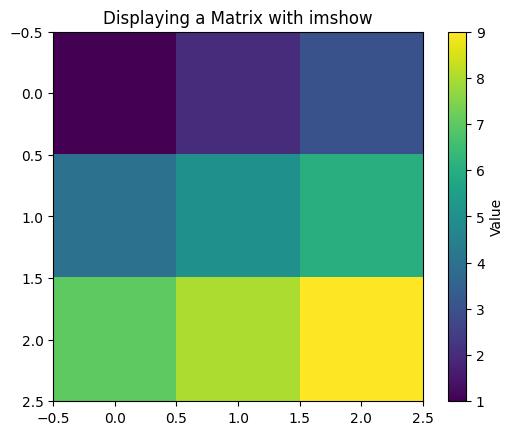

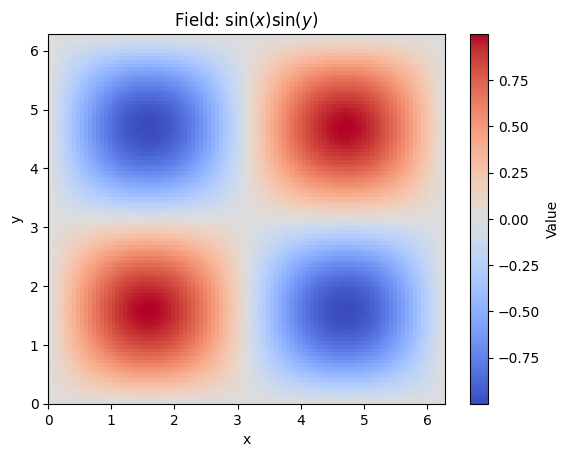

In [77]:
# Example 1: Display a matrix using imshow
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
plt.imshow(matrix, cmap='viridis')
plt.title("Displaying a Matrix with imshow")
plt.colorbar(label='Value')
plt.show()

# Example 2: Displaying sin(x) * sin(y) as a field
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.sin(Y)

plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower',
           cmap='coolwarm', aspect='auto')
plt.title(r"Field: $\sin(x)\sin(y)$")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Value')
plt.show()

* **Histogram**: it is often very useful to plot the histogram of a property of a large amount of samples. It tells how the population distributed with respect to this property. Here is an example

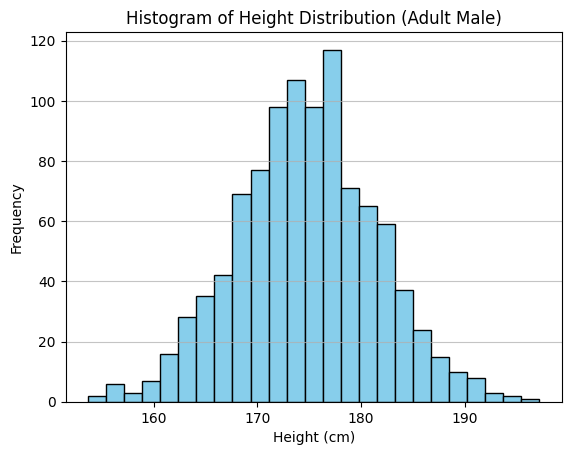

In [78]:
# Example: Histogram of height distribution of adult males

# Simulate some height data (in centimeters) for adult males
mean_height = 175   # mean height in cm
std_dev = 7         # standard deviation in cm
num_samples = 1000  # number of samples

heights = np.random.normal(loc=mean_height, scale=std_dev, size=num_samples)

plt.hist(heights, bins=25, color='skyblue', edgecolor='black')
plt.title("Histogram of Height Distribution (Adult Male)")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
print(pn)

In [ ]:
def f(idx=0):
  print(idx)
  if idx<100:
    f(idx+1)


In [ ]:
print(type(int()))
print(type(f))

In [ ]:
print(jj)

In [ ]:
def f(*arg, **kwargs):

  for item in arg:
    print(item)
    item = 'changed'
  # arg[0] = 'New'
  for key, value in kwargs.items():
    print(key, value, ' id.', id(value))
    kwargs[key] = 'changed'

In [ ]:
l = ['5', '9']
f(l[0], l[1], mam=l[0], wm=True)

In [ ]:
id(l[0])

In [ ]:
l